M. Amintoosi

pth, python 3.7.16, numpy 1.21.5
threadpoolctl, Version: 2.2.0

In [9]:
import numpy as np

# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# from sklearn.gaussian_process import GaussianProcessClassifier

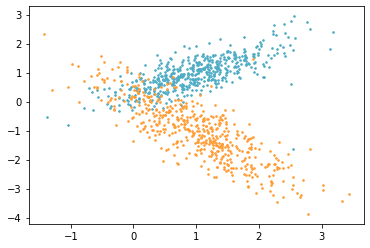

AttributeError: 'NoneType' object has no attribute 'split'

In [2]:
n_samples = 1000
n_components = 4
# Define an empty list to store the accuracy scores
scores = []
n_dimensions = [2, 5, 10, 50, 100]  # , 200]#, 1000]

for d in n_dimensions:
    X, y = make_classification(
        n_samples=n_samples,
        n_features=d,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1,
    )
    # X, y = make_blobs(
    #     n_samples=n_samples,n_features=d,
    #     centers=n_components, cluster_std=1, random_state=0
    # )

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train a k-nearest neighbor classifier with k=5
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Predict the test labels
    y_pred = clf.predict(X_test)

    # Compute the accuracy score
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if d == 2:
        # Plot init seeds along side sample data
        plt.figure(1)
        colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

        for k, col in enumerate(colors):
            cluster_data = y == k
            plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
        plt.show()

# Plot the accuracy scores versus the number of features
plt.plot(n_dimensions, scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy score")
plt.title("Curse of dimensionality in k-nearest neighbor classification")
plt.xticks(n_dimensions)
# plt.xscale("log")
plt.show()

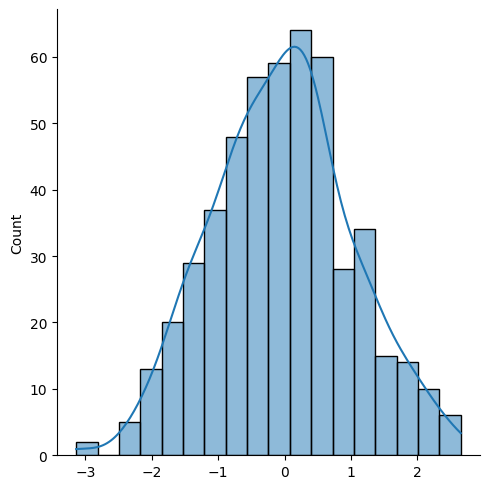

In [2]:
data = X[y == 0, 0]
# sns.distplot(data, fit=norm, kde=True)
sns.displot(data, kde=True)

In [60]:
!pip show threadpoolctl

Name: threadpoolctl
Version: 2.2.0
Summary: threadpoolctl
Home-page: https://github.com/joblib/threadpoolctl
Author: Thomas Moreau
Author-email: thomas.moreau.2010@gmail.com
License: BSD-3-Clause
Location: c:\users\hp\.conda\envs\pth\lib\site-packages
Requires: 
Required-by: scikit-learn


In [61]:
!pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\hp\.conda\envs\pth\lib\site-packages
Requires: 
Required-by: astropy, bkcharts, blis, bokeh, Bottleneck, cmaes, cogdl, daal4py, DeepXDE, dgl, geneticalgorithm, gensim, gradio, greatx, h5py, imagecodecs, imageio, karateclub, matplotlib, matplotlib-venn, mkl-fft, mkl-random, nibabel, nipype, numba, numexpr, ogb, opencv-python, optuna, pandas, patsy, pybryt, pycm, pyDOE, pyerfa, pygod, PyGSP, pyswarm, python-louvain, PyWavelets, scikit-image, scikit-learn, scikit-optimize, scipy, seaborn, spacy, statsmodels, tables, thinc, tifffile, torch-geometric, torch-geometric-temporal, torchvision, transformers, visdom, yellowbrick


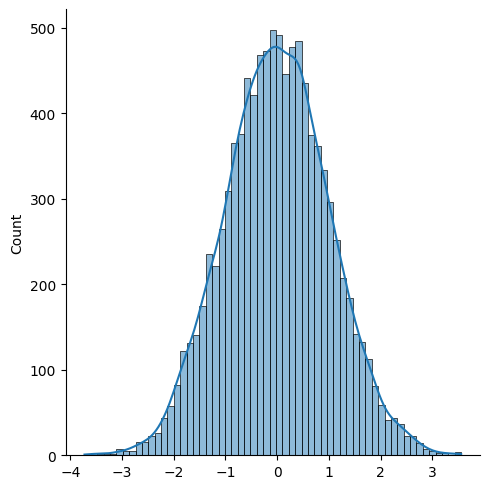

In [27]:
x = np.random.randn(10000)
sns.displot(x, kde=True)

میانگین ایکس صفر هست اما میانگین قدرمطلق ایکس‌ها که اندازه فاصله آنها تا مبدا هست، صفر نیست.

In [28]:
abs_x = np.abs(x)
print(abs_x.mean(), np.sqrt(np.var(x)))
# sns.displot(abs_x, kde=False)

0.8023913864565412 1.0039706749033976


According to [Wiki](https://en.wikipedia.org/wiki/Curse_of_dimensionality): 
most of the volume of the d-cube concentrates near the boundary of a sphere of radius $\sigma \sqrt{d}$

In [48]:
x = np.random.randn(100, 2)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(2))
# sns.displot(norm_x, kde=False)

1.3100443255707683 1.4142135623730951


In [52]:
x = np.random.randn(10000, 200)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(200))

14.137647773794225 14.142135623730951


برمی‌گردیم به تولید نقاط تصادفی در گوی واحد.

ابتدا تولید نقاط تصادفی با توزیع یکنواخت بر روی دایره.

روش مختصات قطبی قابل تعمیم به فضاهای بالاتر نیست.

نشان می دهیم که اگر داده ها با توزیع نرمال در فضا تولید شده و سپس بر روی کره واحد نگاشت شوند توزیع آنها بر روی سطح کره یکنواخت هست

اگر هر داده را بر نرمش تقسیم کنیم، اندازه‌ی همه داده‌ها یک خواهد شد و روی کره‌ی واحد قرار خواهند گرفت

$$x = (x_1,x_2,\dots,x_d)$$
$$x_i \sim \mathcal{N}(\mu,\sigma^2)$$
$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$
$$\mu=0, \sigma^2=1$$
$$f(x_i) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x_i^2}$$

$$y=\frac{x}{||x||}$$
وای یک بردار تصادفی یکه با توزیع یکنواخت روی کره واحد است

مطابق روابط ۱.۱۹ و ۱.۲۰ از کتاب زکی تابع چگالی ایکس به صورت زیر است:

Joint probability function  of $x$ is given as:
$$
\large
\begin{aligned}
f(x)&=\prod_{i=1}^d f(x_i)\\
&= \prod_{i=1}^d\frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x_i^2}
\\ 
&= \left(\frac{1}{\sqrt{2\pi}}\right)^d e^{-\frac{1}{2}\sum_{i=1}^dx_i^2} \\
&= \frac{1}{\pi^{d/2}} e^{-\frac{||x||^2}{2}}
\end{aligned}
$$
یعنی چگالی ففط به اندازه بردار بستگی دارد. پس همه نقاط روی کره‌ی به شعاع مشخص چگالی یکسانی دارند.

دوباره تکه برنامه قبلی رو می‌نویسیم


In [53]:
x = np.random.randn(100, 2)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(2))
# sns.displot(norm_x, kde=False)
x.shape, norm_x[:,np.newaxis].shape

1.1335317957030193 1.4142135623730951


((100, 2), (100, 1))

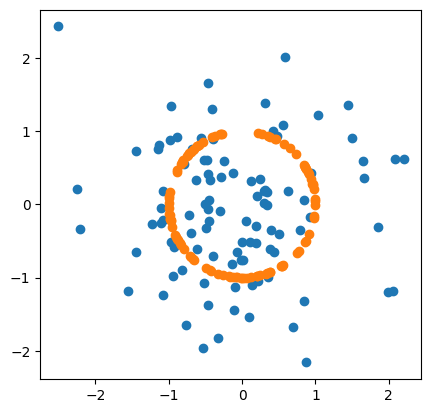

In [54]:
y = x/norm_x[:,np.newaxis]
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

با داشتن اعداد تصادفی با توزیع یکنواخت
 می‌توان با هر توزیعی تولید کرد

 https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p

In [8]:
from statistics import NormalDist # Needs Python >= 3.8
x = np.random.rand(1000)
y = [NormalDist().inv_cdf(a) for a in x]
y = np.array(y)
print(y.mean(), y.var())

0.016766858563688886 1.0138213561628926


c:\Users\hp\.conda\envs\p310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


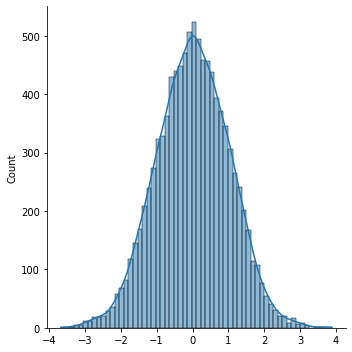

In [11]:
sns.displot(y, kde=True)